In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"we are ussing {device} ")

we are ussing cuda 


In [3]:
file = pd.read_csv("bhooj_earthquake_dataset.csv")
x = file.drop(["Target"],axis=1).values
y = file["Target"].values
# split the data into target(y) and features(x)

In [4]:
# define our scaler function for scalling from preprocessing
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [5]:
xt = x_scaler.fit_transform(x)
yt = y_scaler.fit_transform(y.reshape(-1,1))

In [6]:
x_train,x_test,y_train,y_test = train_test_split(xt,yt,test_size = 0.3,random_state=42)
# spliting the dat so we can evluate later on with unseen data

In [7]:
# converting to torch tensor
x_train = torch.tensor(x_train,dtype = torch.float32).to(device)
x_test = torch.tensor(x_test,dtype = torch.float32).to(device)
y_train = torch.tensor(y_train,dtype = torch.float32).to(device)
y_test = torch.tensor(y_test,dtype = torch.float32).to(device)
# converting to 3d - 2d
x_train = x_train.unsqueeze(-1)
x_test = x_test.unsqueeze(-1)

In [37]:
epochs = 300
input_size = 1
hidden_size = 55
output_size = 1
num_layers = 6
model = torch.load("LSTM_EarthQuake_model_v3.pth")
model.to(device)
output_layer = nn.Linear(hidden_size,output_size).to(device)
optimizer = optim.Adam(list(model.parameters()) + list(output_layer.parameters()),lr=0.0001)
loss1 = np.zeros(epochs)
loss2 = np.zeros(epochs)
loss_fn = nn.MSELoss()


C:\Users\erobo\AppData\Local\Temp\ipykernel_13356\2123853197.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("LSTM_EarthQuake_model_v3.pth")


In [45]:
for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    output , hidden = model(x_train)
    preds = output_layer(output[:,-1,:])
    loss = loss_fn(preds,y_train)
    loss.backward()
    loss1[i] = loss.item()
    optimizer.step()
    print(f"MSE = {loss1[i]}")


MSE = 0.042059898376464844
MSE = 0.042059678584337234
MSE = 0.04205945506691933
MSE = 0.04205923154950142
MSE = 0.04205900803208351
MSE = 0.042058784514665604
MSE = 0.0420585572719574
MSE = 0.04205833002924919
MSE = 0.042058106511831284
MSE = 0.04205787554383278
MSE = 0.04205764830112457
MSE = 0.04205741733312607
MSE = 0.042057186365127563
MSE = 0.04205695539712906
MSE = 0.042056720703840256
MSE = 0.04205648601055145
MSE = 0.04205625131726265
MSE = 0.042056016623973846
MSE = 0.042055778205394745
MSE = 0.04205554351210594
MSE = 0.04205530509352684
MSE = 0.04205506667494774
MSE = 0.04205482453107834
MSE = 0.04205458611249924
MSE = 0.04205434396862984
MSE = 0.04205409809947014
MSE = 0.04205385595560074
MSE = 0.04205361008644104
MSE = 0.04205336421728134
MSE = 0.04205311834812164
MSE = 0.042052872478961945
MSE = 0.04205262288451195
MSE = 0.04205237329006195
MSE = 0.042052119970321655
MSE = 0.04205187037587166
MSE = 0.042051613330841064
MSE = 0.04205136373639107
MSE = 0.042051106691360474
M

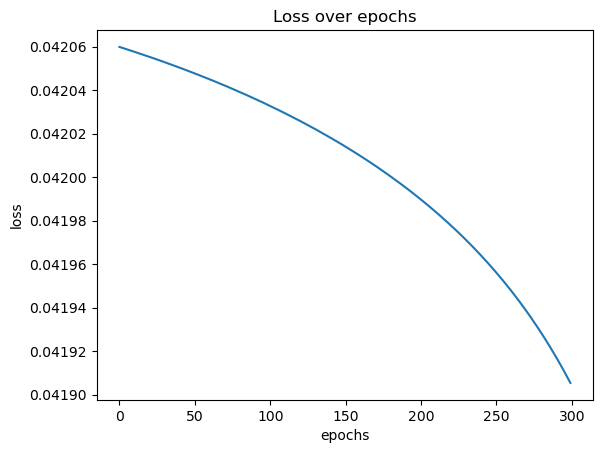

In [50]:
sns.lineplot(loss1)
plt.title("Loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [51]:
# put model in evaluation mode 
model.eval()

LSTM(1, 55, num_layers=5, batch_first=True)

In [52]:
output , hidden = model(x_test)
preds = output_layer(output[:,-1,:])
loss = loss_fn(preds,y_test)
loss2[i] = loss.item()
print(f"MSE = {loss2[i]}")

MSE = 0.04434310644865036


### loss result
- We can colclude that the loss achived in the model via the bhooj earh quake data is very good and accurate aswell
- as we can find the error by reverseing the mse and mse is mean squared error the error is the square root of the value which is around 0.2106 which is an out standing error as it indicates that the model is 99.7894% accruate which is increadible